### EDA

In [27]:
import pandas as pd

In [28]:
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

##### Descriptive Statistics: Get the summary statistics (mean, std, min, max, etc.) for numerical columns to understand the central tendency and spread.

In [29]:
final_combined_data_cleaned.describe()

,year,pH,EC,Phosphorus,Potassium,OM,Urea1,Urea2,Urea3,Urea4,...,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration_sum,Yield,Sown
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.0
mean,2018.999810,5.635805,0.098332,15.964957,105.829481,3.396024,7.058617,12.663448,10.411375,5.906555,...,34197.199533,1116.408963,1561.725331,16.426490,37.498784,182.211909,3412.442462,729.410632,3651.885028,1.0
std,2.581915,1.056754,0.107890,17.189961,75.371909,3.186679,4.355157,7.162423,5.978502,3.189126,...,1952.344023,484.582833,680.266910,4.324140,6.793477,53.259205,216.003701,96.498502,735.749061,0.0
min,2015.000000,3.000000,0.001000,0.000000,0.100000,0.010000,0.048000,0.084000,0.070000,0.048000,...,26952.864153,141.900000,286.000000,7.441530,23.879670,58.666667,2795.310000,505.690000,1757.875000,1.0
25%,2017.000000,4.800000,0.040000,6.300000,53.000000,1.600000,4.280000,7.176000,5.950000,3.944000,...,32975.177104,797.300000,1095.000000,13.599454,32.596154,126.851648,3264.830000,672.770000,3093.796969,1.0
50%,2019.000000,5.400000,0.070000,11.300000,84.500000,2.500000,6.475000,12.804000,10.406000,5.656000,...,34095.727650,1074.000000,1407.000000,15.763934,36.817582,200.202186,3394.850000,707.207500,3565.853881,1.0
75%,2021.000000,6.500000,0.120000,18.200000,137.000000,4.000000,9.260000,18.216000,14.720000,8.208000,...,35572.449945,1422.650000,1906.500000,18.538798,42.091257,219.065574,3546.130000,754.960000,4156.499935,1.0
max,2023.000000,9.900000,1.635000,151.950000,534.000000,29.050000,20.000000,30.000000,26.000000,14.000000,...,39027.778251,3336.500000,3446.000000,29.768852,59.251913,280.879781,4024.710000,1085.700000,6073.440987,1.0


##### Checking for Missing Values: Ensure there are no missing values in the dataset.

In [30]:
final_combined_data_cleaned.isnull().sum()

year                              0
District                          0
season                            0
Condition                         0
pH                                0
EC                                0
Phosphorus                        0
Potassium                         0
OM                                0
Urea1                             0
Urea2                             0
Urea3                             0
Urea4                             0
TSP0                              0
MOP1                              0
MOP2                              0
MOP3                              0
temperature_2m_max                0
temperature_2m_min                0
temperature_2m_mean               0
daylight_duration                 0
sunshine_duration                 0
rain_sum                          0
precipitation_hours               0
wind_speed_10m_max                0
wind_gusts_10m_max                0
wind_direction_10m_dominant       0
shortwave_radiation_sum     

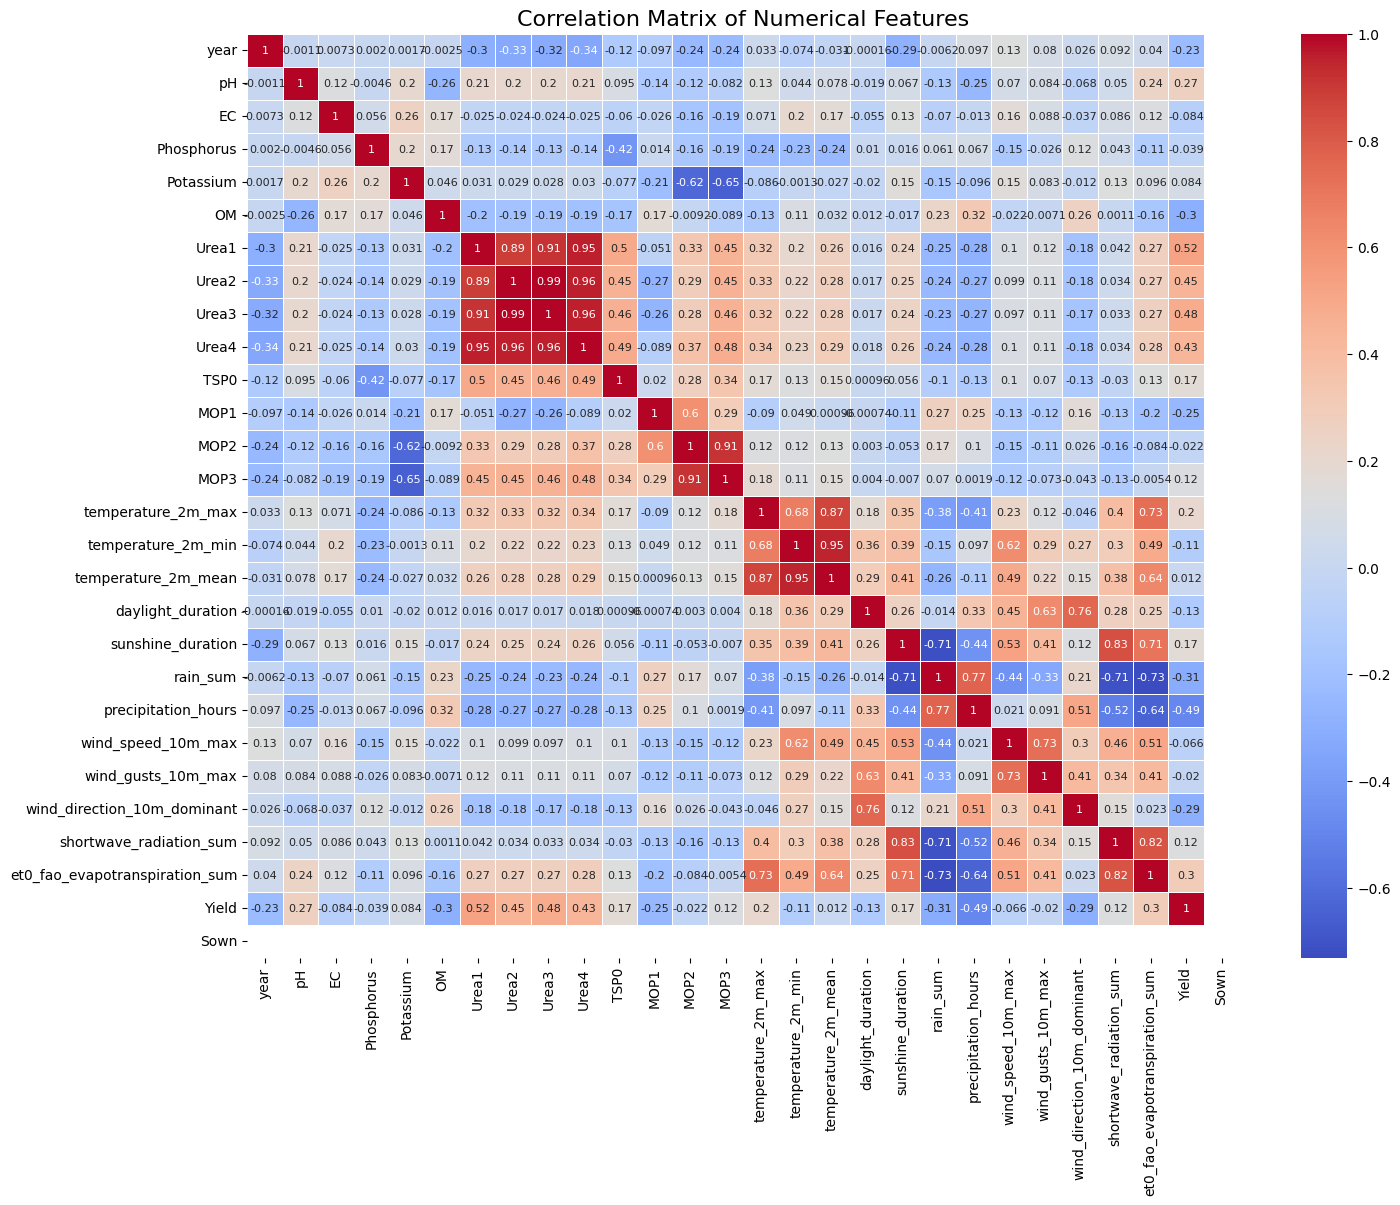

In [31]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

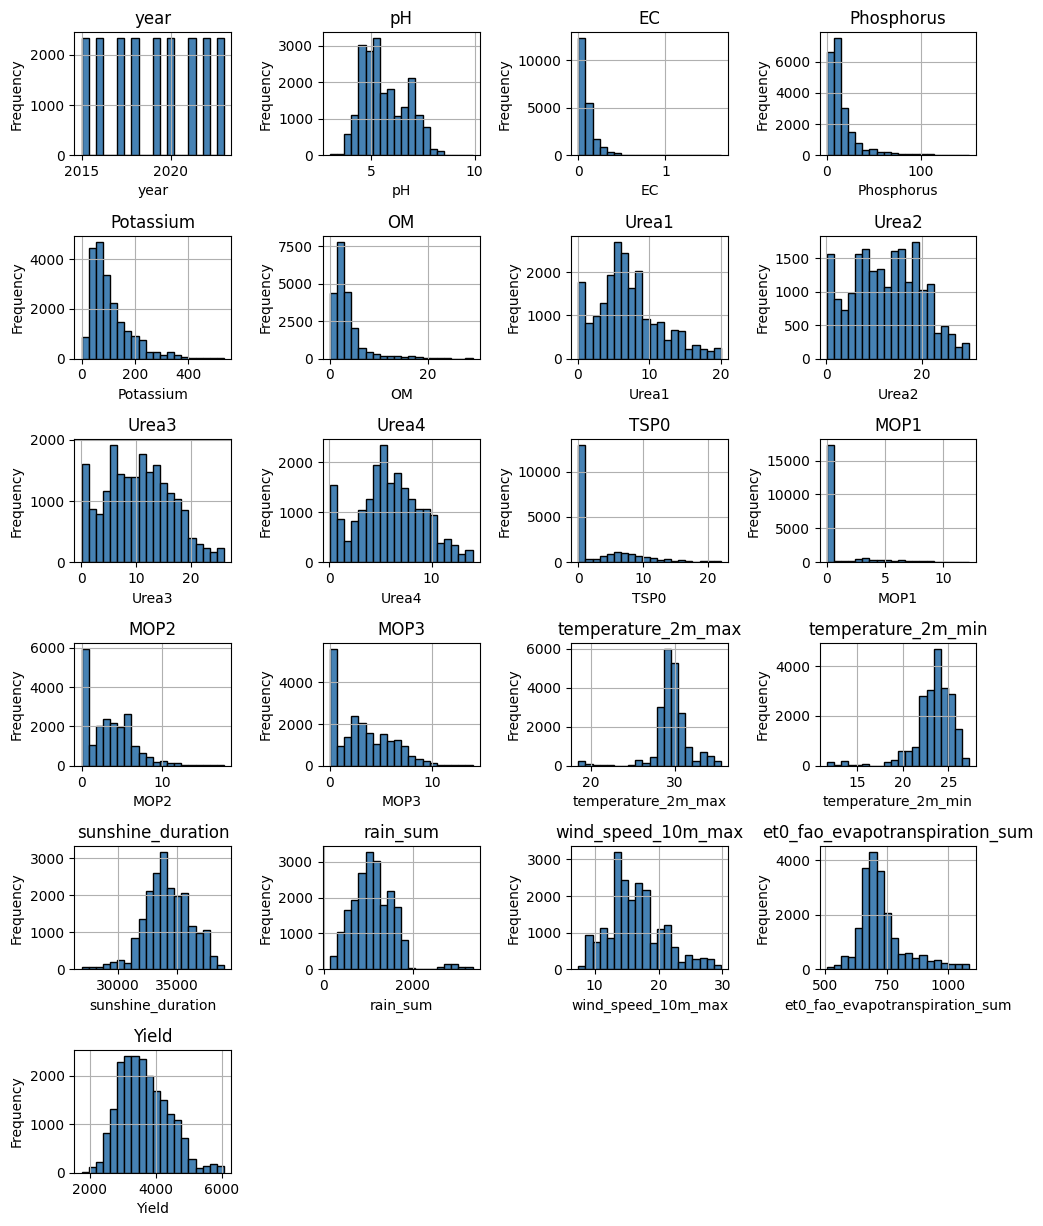

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def showdist():
    numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(numerical_columns):
        plt.subplot(8, 4, i + 1)  # Fixed grid of 3x3
        final_combined_data_cleaned[col].hist(bins=20, color='steelblue', edgecolor='black')
        plt.title(f'{col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


final_combined_data_cleaned = final_combined_data_cleaned.drop(['wind_direction_10m_dominant','wind_gusts_10m_max','precipitation_hours','daylight_duration','shortwave_radiation_sum', 'temperature_2m_mean', 'Sown'], axis=1)

showdist()

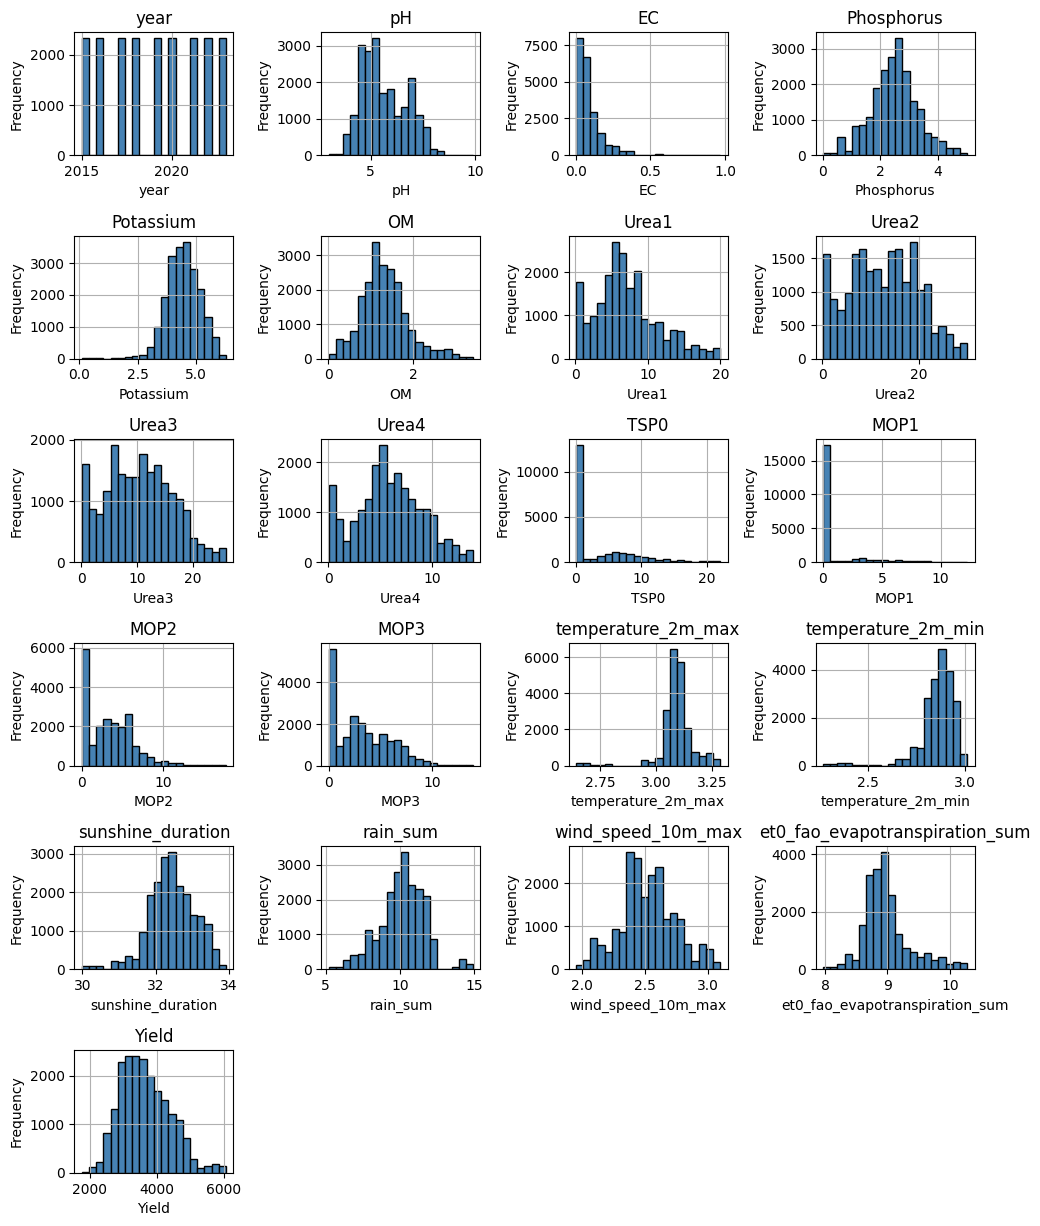

In [11]:
import numpy as np 

final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

showdist()


In [12]:
# numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])

# plt.figure(figsize=(10, 16))
# for i, col in enumerate(numerical_columns):
#     plt.subplot(8, 4, i + 1)  
#     sns.boxplot(y=final_combined_data_cleaned[col], color='lightblue')
#     plt.title(f'{col} Boxplot')
# plt.tight_layout()
# plt.show()

##### Distribution of Target Variable (Yield): Plot the distribution of the target variable (Yield) to understand its skewness or potential outliers

### Corela

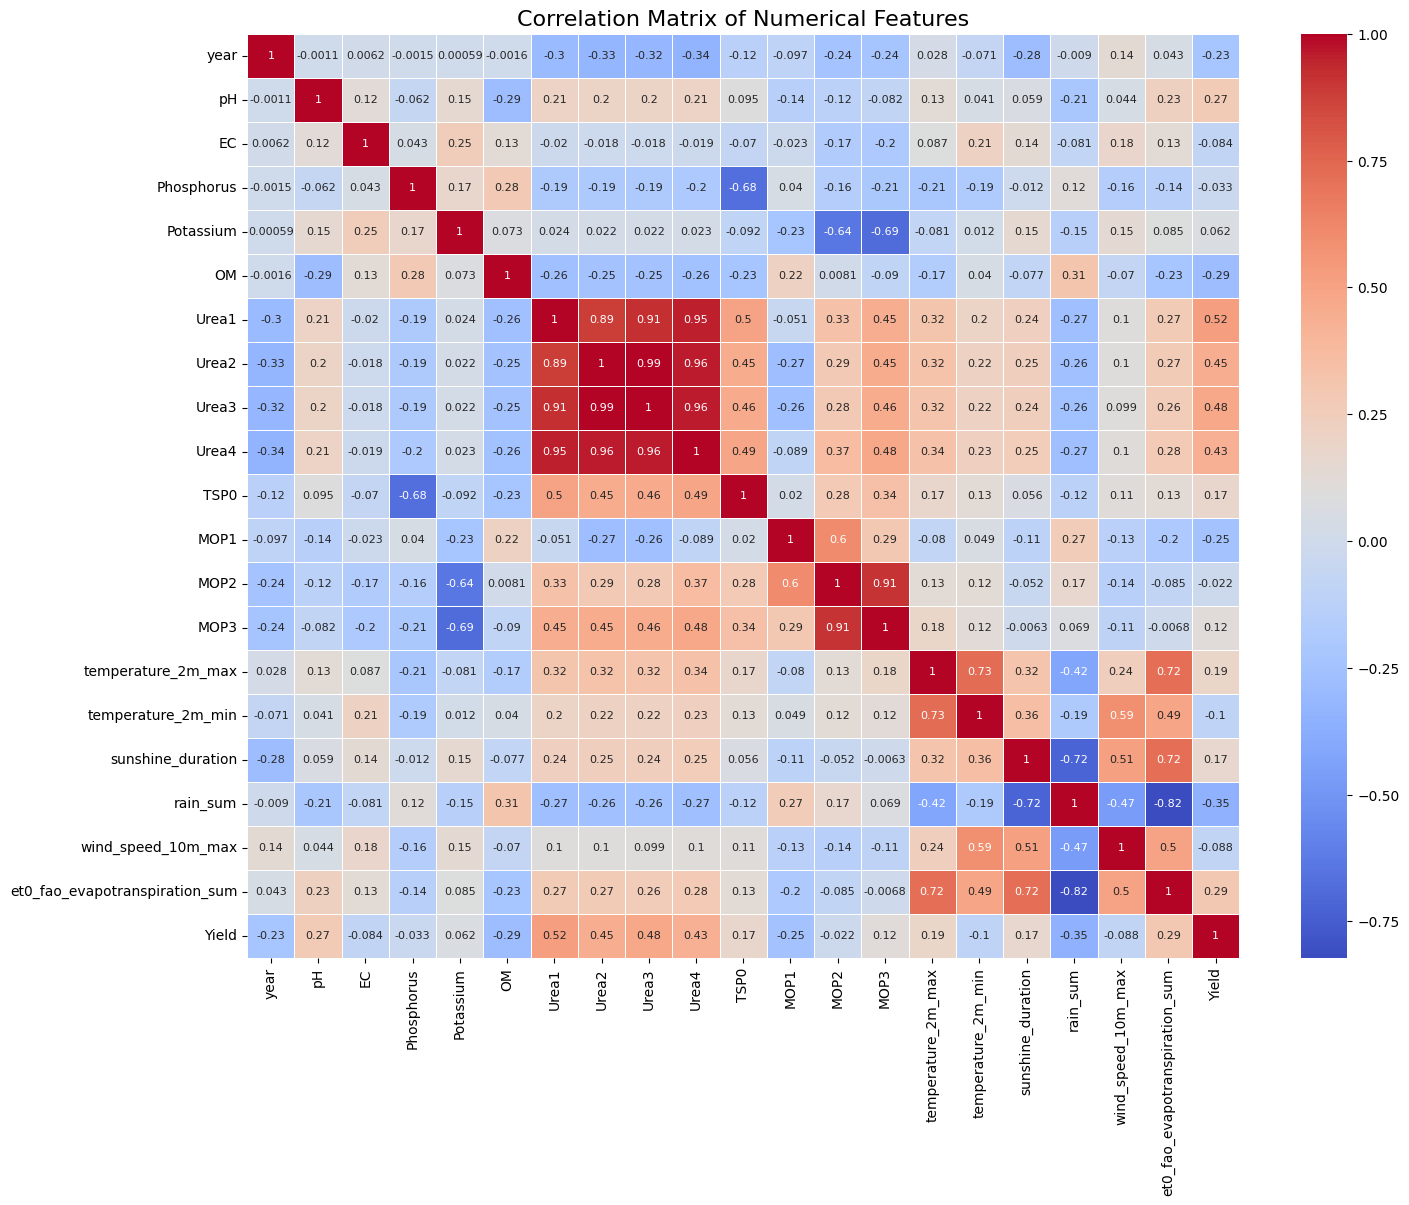

In [13]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [14]:
# final_combined_data_cleaned.groupby(['year', 'season'])['Yield'].mean().plot(kind='line', title='Average Yield Over Seasons')

### For high layer count

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=rbf; total time=  21.0s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=rbf; total time=  20.5s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=rbf; total time=  20.6s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=rbf; total time=  21.1s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=rbf; total time=  20.8s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=linear; total time=  10.1s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=linear; total time=  10.1s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=linear; total time=  10.1s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=linear; total time=  10.5s
[CV] END svr__C=0.1, svr__degree=2, svr__gamma=scale, svr__kernel=linear; total time=  10.6s
[CV] END svr__C=0.1, sv

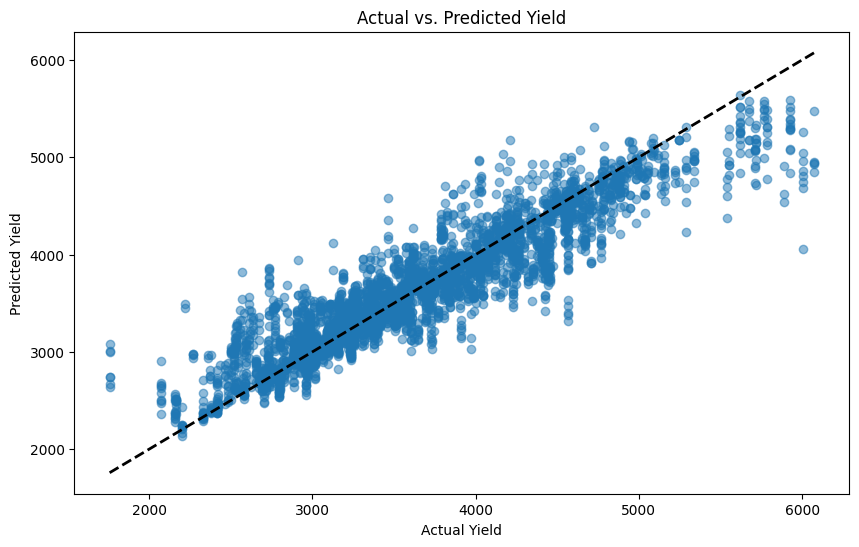

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Load data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

# Apply transformations
transformations = {
    'Phosphorus': np.log1p, 'Potassium': np.log1p, 'OM': np.log1p, 'EC': np.log1p,
    'temperature_2m_max': np.cbrt, 'temperature_2m_min': np.cbrt,
    'rain_sum': np.cbrt, 'sunshine_duration': np.cbrt,
    'wind_speed_10m_max': np.cbrt, 'et0_fao_evapotranspiration_sum': np.cbrt
}
for feature, func in transformations.items():
    final_combined_data_cleaned[feature] = func(final_combined_data_cleaned[feature])

# Encode categorical variables
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Feature selection
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 'Urea1', 'Urea2', 'Urea3', 'Urea4',
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 'wind_speed_10m_max', 'et0_fao_evapotranspiration_sum', 'Season'] + \
           [col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Scaling and splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline setup
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Parameter grid for GridSearchCV
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__kernel': ['rbf', 'linear', 'poly'],
    'svr__degree': [2, 3, 4]  # Only used if kernel is 'poly'
}

# GridSearchCV setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions and performance evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Line of perfect prediction
plt.show()


Best Parameters: {'svr__C': 100, 'svr__degree': 2, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
Mean Squared Error: 81149.6140321261
R^2 Score: 0.8506243398828726
Mean Absolute Error: 192.72821379514446


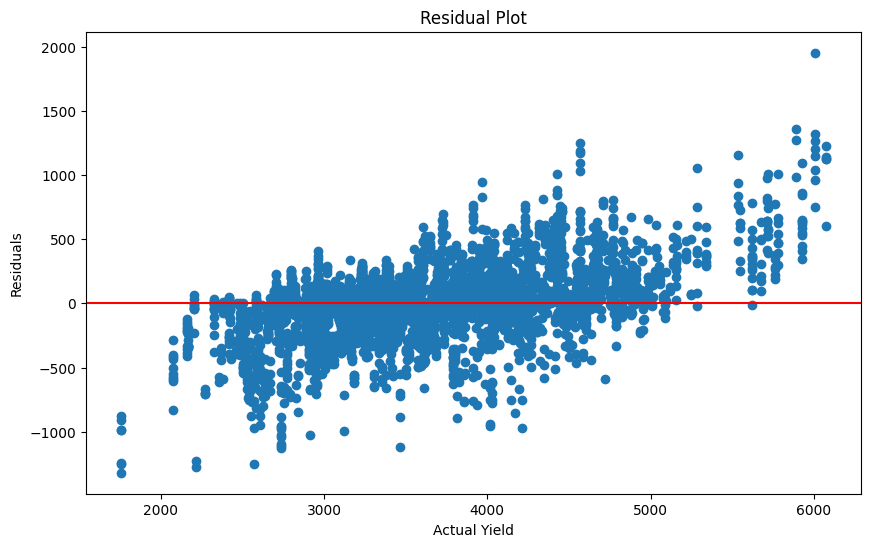

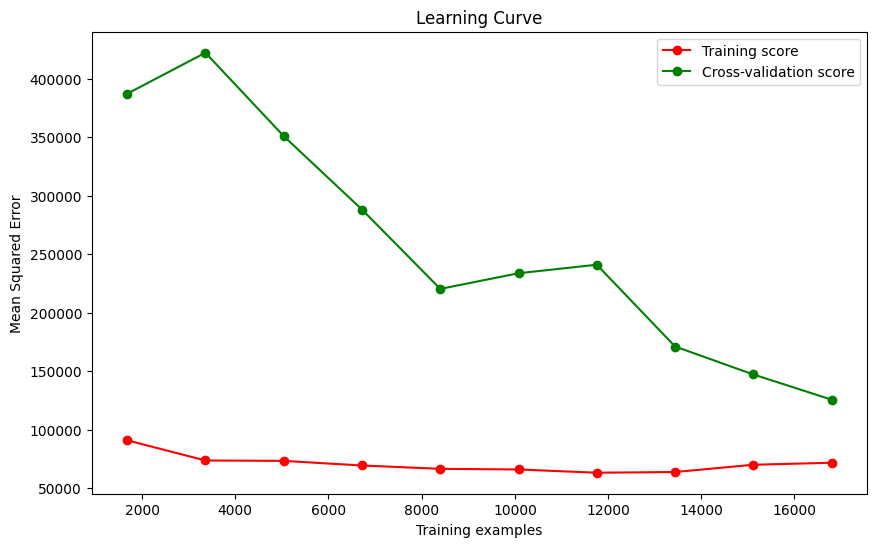

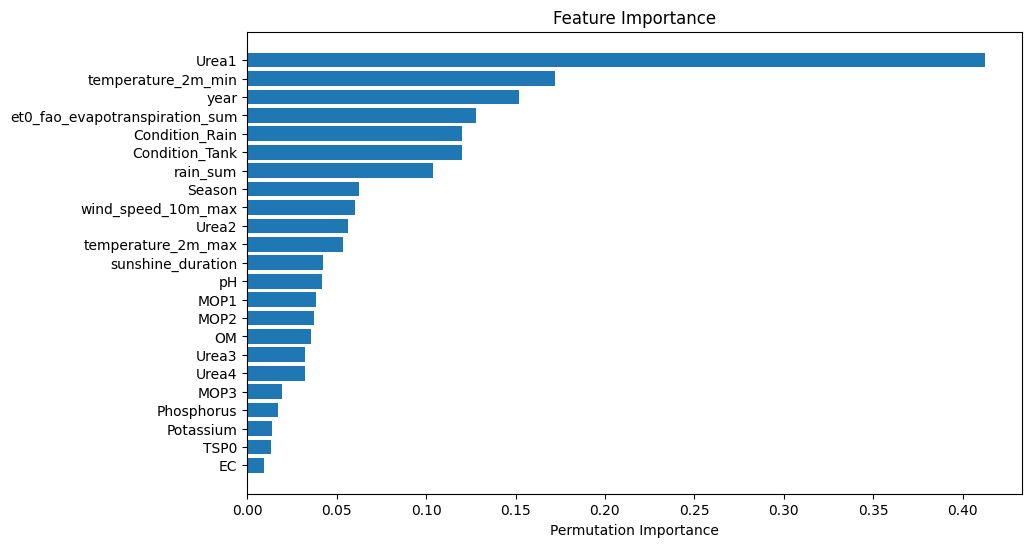

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

# Load data and preprocess (assuming already done, focusing on additional metrics and plots)

# Best model from earlier setup
best_model = grid_search.best_estimator_

# Predictions and initial performance evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print performance metrics
print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean Absolute Error:", mae)

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Yield')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc="best")
plt.show()

# Permutation Importance (this can be computationally expensive depending on the dataset size)
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()


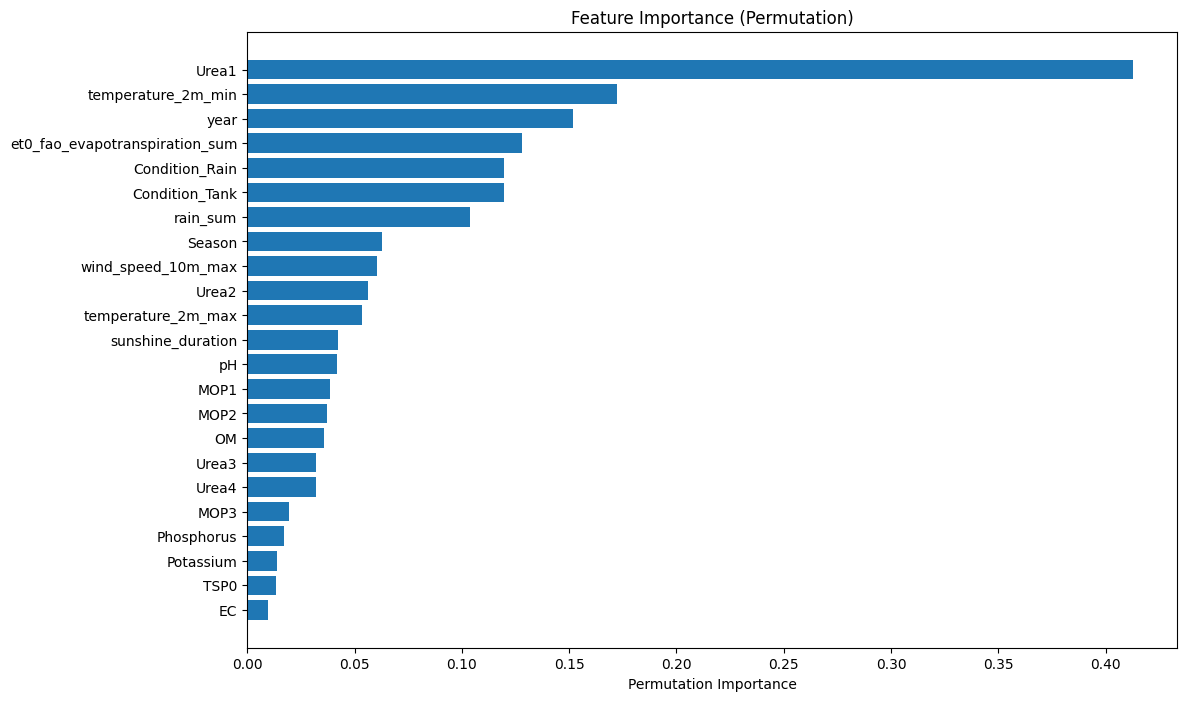

In [3]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance (this can be computationally expensive)
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(np.array(features)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()
